In [ ]:
!pip install kornia
!pip install kornia-rs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.0 MB/s eta 0:00:00


# Image Bluring

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import torch
from torchvision.transforms import functional as tvF
from torchvision.transforms import transforms
import kornia
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()

response = requests.get("https://tinypng.com/images/social/website.jpg")
img = Image.open(BytesIO(response.content))

in_tensor = to_tensor(img)
in_pil = img

response = requests.get("https://tinypng.com/images/social/website.jpg")
content = BytesIO(response.content)
image_array = np.asarray(bytearray(content.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

Original Image Size (Kornia): 4218.75 Kb
Kornia Gaussian Blurred Image Size: 4218.75 Kb
Original Image Size (OpenCV): 119.79 Kb
OpenCV Gaussian Blurred Image Size: 62.02 Kb


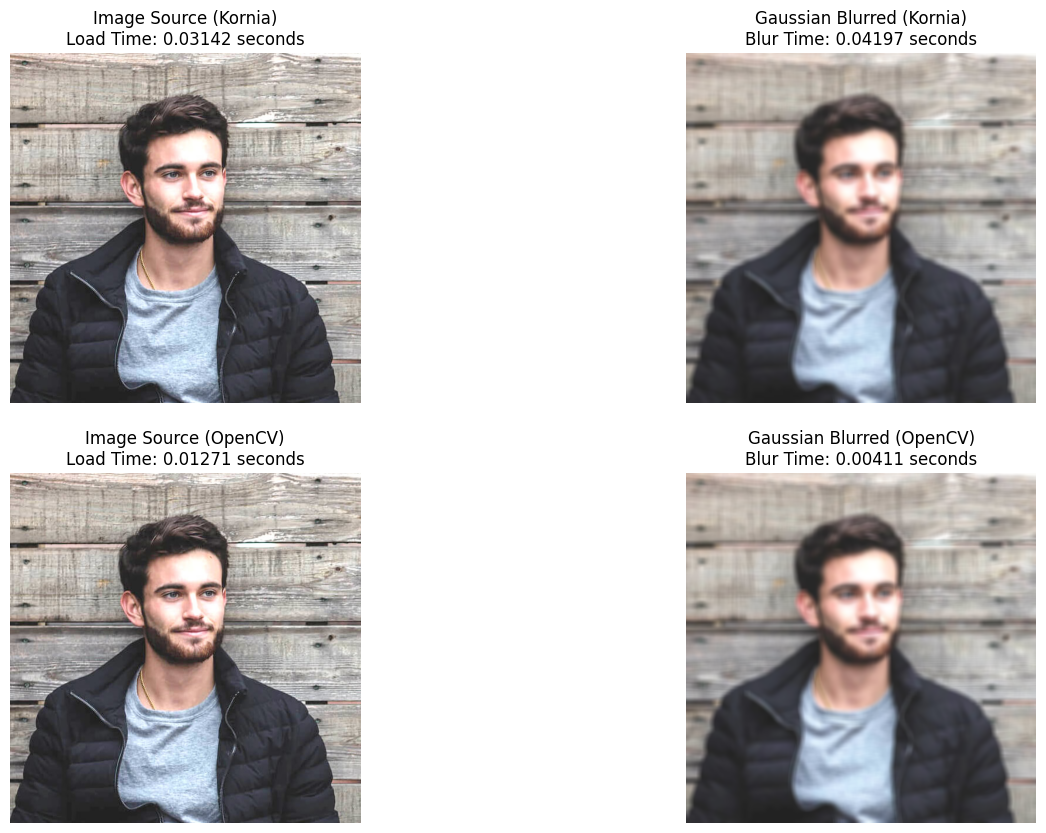

In [ ]:
import kornia
import torch
import cv2
import matplotlib.pyplot as plt
import time
from io import BytesIO

# Load image with Kornia
start_time_kornia = time.time()
data = kornia.io.load_image("./photo.jpg", kornia.io.ImageLoadType.RGB32)[None, ...]
end_time_kornia = time.time()

# Create the operator with Kornia
gauss_kornia = kornia.filters.GaussianBlur2d((11, 11), (10.5, 10.5))

# Blur the image with Kornia
start_time_blur_kornia = time.time()
x_blur_kornia: torch.tensor = gauss_kornia(data)
end_time_blur_kornia = time.time()

# Convert back to numpy with Kornia
img_blur_kornia = kornia.tensor_to_image(x_blur_kornia)

# Calculate sizes for Kornia
original_size_kb_kornia = len(BytesIO(data.numpy().tobytes()).read()) / 1024
kornia_size_kb = len(BytesIO(img_blur_kornia.tobytes()).read()) / 1024

# Load image with OpenCV
start_time_opencv = time.time()
image_opencv = cv2.imread("./photo.jpg")
image_opencv_rgb = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, convert to RGB
end_time_opencv = time.time()

# Apply Gaussian Blur with OpenCV
start_time_blur_opencv = time.time()
blur_opencv = cv2.GaussianBlur(image_opencv_rgb, (11, 11), 10.5)
end_time_blur_opencv = time.time()

# Calculate sizes for OpenCV
original_size_kb_opencv = len(BytesIO(cv2.imencode('.jpg', image_opencv_rgb)[1].tobytes()).read()) / 1024
opencv_size_kb = len(BytesIO(cv2.imencode('.jpg', blur_opencv)[1].tobytes()).read()) / 1024

print(f"Original Image Size (Kornia): {original_size_kb_kornia:.2f} Kb")
print(f"Kornia Gaussian Blurred Image Size: {kornia_size_kb:.2f} Kb")
print(f"Original Image Size (OpenCV): {original_size_kb_opencv:.2f} Kb")
print(f"OpenCV Gaussian Blurred Image Size: {opencv_size_kb:.2f} Kb")

# Create the plot for both Kornia and OpenCV
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.ravel()

# Plot for Kornia
axs[0].axis("off")
axs[0].set_title(f"Image Source (Kornia)\nLoad Time: {end_time_kornia - start_time_kornia:.5f} seconds")
axs[0].imshow(kornia.tensor_to_image(data))

axs[1].axis("off")
axs[1].set_title(f"Gaussian Blurred (Kornia)\nBlur Time: {end_time_blur_kornia - start_time_blur_kornia:.5f} seconds")
axs[1].imshow(img_blur_kornia)

# Plot for OpenCV
axs[2].axis("off")
axs[2].set_title(f"Image Source (OpenCV)\nLoad Time: {end_time_opencv - start_time_opencv:.5f} seconds")
axs[2].imshow(image_opencv_rgb)

axs[3].axis("off")
axs[3].set_title(f"Gaussian Blurred (OpenCV)\nBlur Time: {end_time_blur_opencv - start_time_blur_opencv:.5f} seconds")
axs[3].imshow(blur_opencv)

plt.show()

Original Image Size (Kornia): 4218.75 Kb
Kornia Box Blur Image Size: 4218.75 Kb
Original Image Size (OpenCV): 119.76 Kb
OpenCV Average Blur Image Size: 67.33 Kb


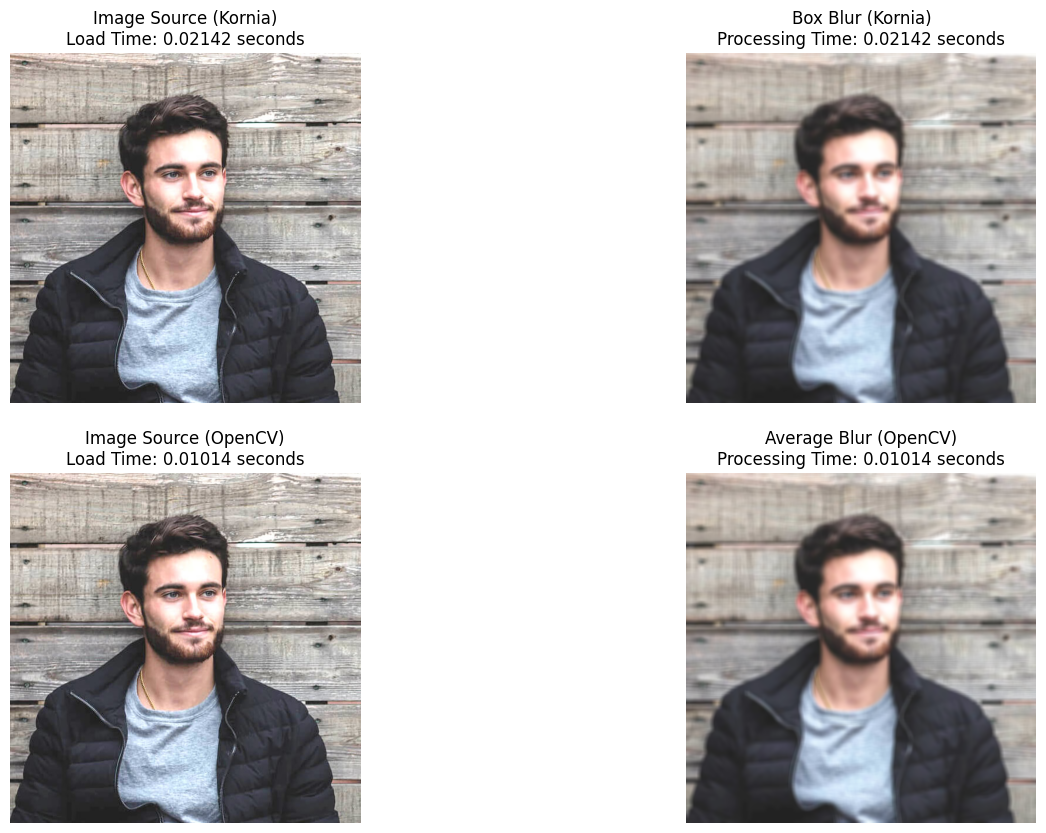

In [ ]:
import kornia
import torch
import cv2
import matplotlib.pyplot as plt
import time
from io import BytesIO

# Load image with Kornia
start_time_kornia = time.time()
data = kornia.io.load_image("./photo.jpg", kornia.io.ImageLoadType.RGB32)[None, ...]
end_time_kornia = time.time()

# Create the box blur operator with Kornia
box_blur_kornia = kornia.filters.box_blur(data, (9, 9))

# Convert back to numpy with Kornia
img_box_blur_kornia = kornia.tensor_to_image(box_blur_kornia)

# Calculate sizes for Kornia
original_size_kb_kornia = len(BytesIO(data.numpy().tobytes()).read()) / 1024
box_blur_kornia_size_kb = len(BytesIO(img_box_blur_kornia.tobytes()).read()) / 1024

# Load image with OpenCV
start_time_opencv = time.time()
image_opencv = cv2.imread("./photo.jpg")
end_time_opencv = time.time()

# Apply average blur with OpenCV
average_blur_opencv = cv2.blur(image_opencv, (9, 9))

# Calculate sizes for OpenCV
original_size_kb_opencv = len(BytesIO(cv2.imencode('.jpg', image_opencv)[1].tobytes()).read()) / 1024
average_blur_opencv_size_kb = len(BytesIO(cv2.imencode('.jpg', average_blur_opencv)[1].tobytes()).read()) / 1024

print(f"Original Image Size (Kornia): {original_size_kb_kornia:.2f} Kb")
print(f"Kornia Box Blur Image Size: {box_blur_kornia_size_kb:.2f} Kb")
print(f"Original Image Size (OpenCV): {original_size_kb_opencv:.2f} Kb")
print(f"OpenCV Average Blur Image Size: {average_blur_opencv_size_kb:.2f} Kb")

# Create the plot for both Kornia and OpenCV
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.ravel()

# Plot for Kornia
axs[0].axis("off")
axs[0].set_title(f"Image Source (Kornia)\nLoad Time: {end_time_kornia - start_time_kornia:.5f} seconds")
axs[0].imshow(kornia.tensor_to_image(data))

axs[1].axis("off")
axs[1].set_title(f"Box Blur (Kornia)\nProcessing Time: {end_time_kornia - start_time_kornia:.5f} seconds")
axs[1].imshow(img_box_blur_kornia)

# Plot for OpenCV
axs[2].axis("off")
axs[2].set_title(f"Image Source (OpenCV)\nLoad Time: {end_time_opencv - start_time_opencv:.5f} seconds")
axs[2].imshow(cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB))

axs[3].axis("off")
axs[3].set_title(f"Average Blur (OpenCV)\nProcessing Time: {end_time_opencv - start_time_opencv:.5f} seconds")
axs[3].imshow(cv2.cvtColor(average_blur_opencv, cv2.COLOR_BGR2RGB))

plt.show()

Original Image Size (Kornia): 4218.75 Kb
Kornia Bilateral Blurred Image Size: 4218.75 Kb
Original Image Size (OpenCV): 119.79 Kb
OpenCV Bilateral Blurred Image Size: 58.99 Kb


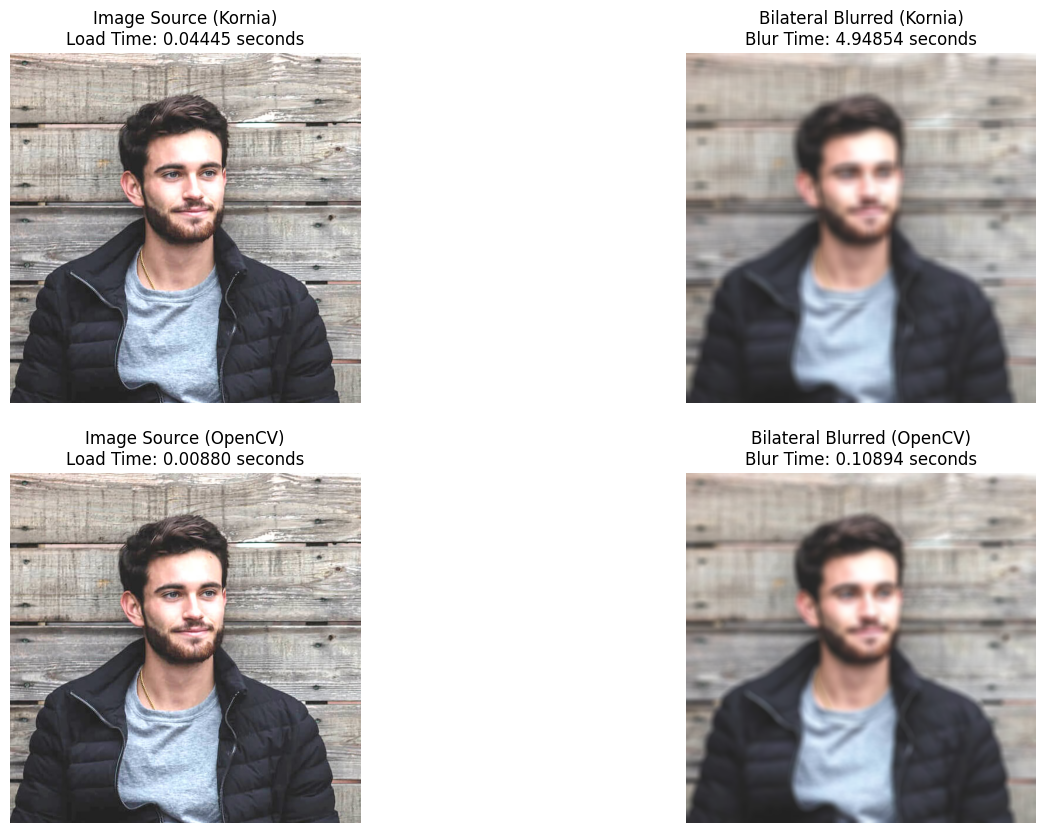

In [ ]:
import kornia
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from io import BytesIO

# Load image with Kornia
start_time_kornia = time.time()
data = kornia.io.load_image("./photo.jpg", kornia.io.ImageLoadType.RGB32)[None, ...]
end_time_kornia = time.time()

# Create the bilateral blur operator with Kornia
start_time_blur_kornia = time.time()
bilateral_kornia = kornia.filters.bilateral_blur(data, (15, 15), 50.0, (150.0, 150.0))  # Adjust sigma_color and sigma_space
end_time_blur_kornia = time.time()

# Convert back to numpy with Kornia
img_blur_kornia = kornia.tensor_to_image(bilateral_kornia)

# Calculate sizes for Kornia
original_size_kb_kornia = len(BytesIO(data.numpy().tobytes()).read()) / 1024
kornia_size_kb = len(BytesIO(img_blur_kornia.tobytes()).read()) / 1024

# Load image with OpenCV
start_time_opencv = time.time()
image_opencv = cv2.imread("./photo.jpg")
image_opencv_rgb = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, convert to RGB
end_time_opencv = time.time()

# Convert image to float32 for OpenCV bilateralFilter
image_opencv_float32 = image_opencv_rgb.astype(np.float32) / 255.0

# Apply bilateral blur with OpenCV
start_time_blur_opencv = time.time()
blur_opencv = cv2.bilateralFilter(image_opencv_float32, 15, 50.0, 150.0)  # Adjust sigma_color and sigma_space
end_time_blur_opencv = time.time()

# Convert back to uint8 after OpenCV bilateralFilter
blur_opencv = (blur_opencv * 255).astype(np.uint8)

# Calculate sizes for OpenCV
original_size_kb_opencv = len(BytesIO(cv2.imencode('.jpg', image_opencv_rgb)[1].tobytes()).read()) / 1024
opencv_size_kb = len(BytesIO(cv2.imencode('.jpg', blur_opencv)[1].tobytes()).read()) / 1024

print(f"Original Image Size (Kornia): {original_size_kb_kornia:.2f} Kb")
print(f"Kornia Bilateral Blurred Image Size: {kornia_size_kb:.2f} Kb")
print(f"Original Image Size (OpenCV): {original_size_kb_opencv:.2f} Kb")
print(f"OpenCV Bilateral Blurred Image Size: {opencv_size_kb:.2f} Kb")

# Create the plot for both Kornia and OpenCV
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.ravel()

# Plot for Kornia
axs[0].axis("off")
axs[0].set_title(f"Image Source (Kornia)\nLoad Time: {end_time_kornia - start_time_kornia:.5f} seconds")
axs[0].imshow(kornia.tensor_to_image(data))

axs[1].axis("off")
axs[1].set_title(f"Bilateral Blurred (Kornia)\nBlur Time: {end_time_blur_kornia - start_time_blur_kornia:.5f} seconds")
axs[1].imshow(img_blur_kornia)

# Plot for OpenCV
axs[2].axis("off")
axs[2].set_title(f"Image Source (OpenCV)\nLoad Time: {end_time_opencv - start_time_opencv:.5f} seconds")
axs[2].imshow(image_opencv_rgb)

axs[3].axis("off")
axs[3].set_title(f"Bilateral Blurred (OpenCV)\nBlur Time: {end_time_blur_opencv - start_time_blur_opencv:.5f} seconds")
axs[3].imshow(blur_opencv)

plt.show()


Original Image Size (Kornia): 4218.75 Kb
Kornia Median Blurred Image Size: 4218.75 Kb
Original Image Size (OpenCV): 119.79 Kb
OpenCV Median Blurred Image Size: 63.96 Kb


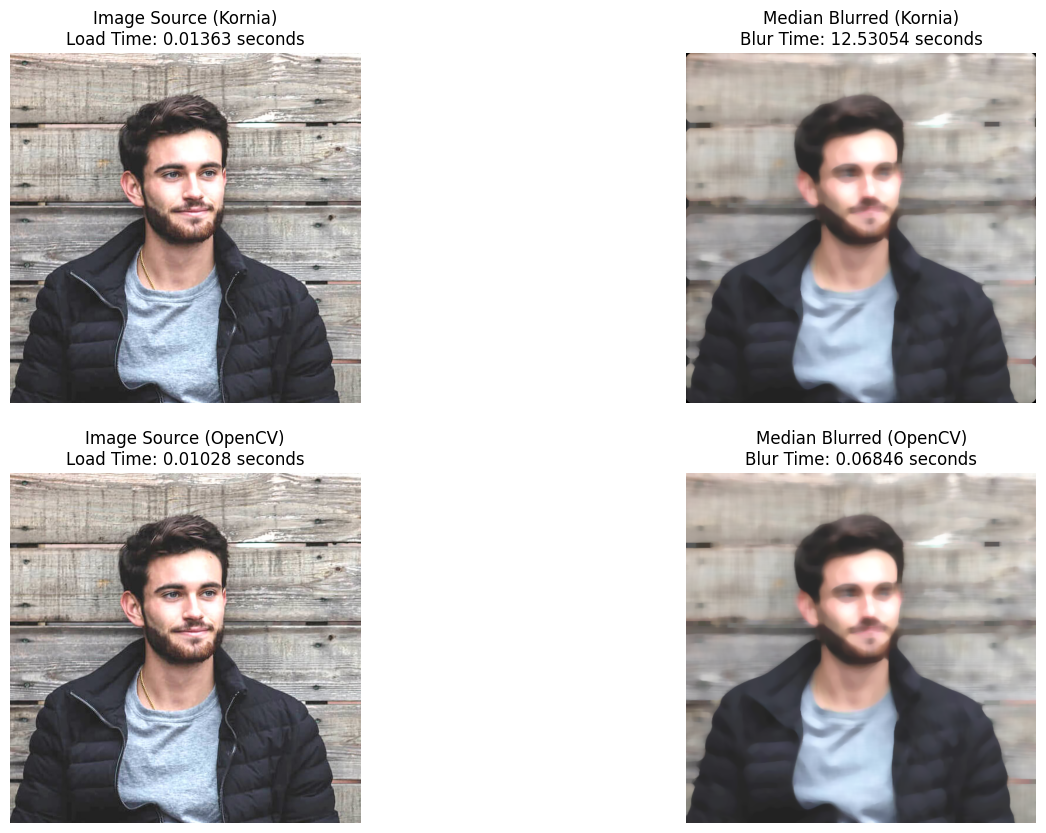

In [ ]:
import kornia
import torch
import cv2
import matplotlib.pyplot as plt
import time
from io import BytesIO

# Load image with Kornia
start_time_kornia = time.time()
data = kornia.io.load_image("./photo.jpg", kornia.io.ImageLoadType.RGB32)[None, ...]
end_time_kornia = time.time()

# Apply median blur with Kornia
start_time_blur_kornia = time.time()
x_blur_kornia: torch.tensor = kornia.filters.median_blur(data, (15, 15))
end_time_blur_kornia = time.time()

# Convert back to numpy with Kornia
img_blur_kornia = kornia.tensor_to_image(x_blur_kornia)

# Calculate sizes for Kornia
original_size_kb_kornia = len(BytesIO(data.numpy().tobytes()).read()) / 1024
kornia_size_kb = len(BytesIO(img_blur_kornia.tobytes()).read()) / 1024

# Load image with OpenCV
start_time_opencv = time.time()
image_opencv = cv2.imread("./photo.jpg")
image_opencv_rgb = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, convert to RGB
end_time_opencv = time.time()

# Apply median blur with OpenCV
start_time_blur_opencv = time.time()
blur_opencv = cv2.medianBlur(image_opencv_rgb, 15)
end_time_blur_opencv = time.time()

# Calculate sizes for OpenCV
original_size_kb_opencv = len(BytesIO(cv2.imencode('.jpg', image_opencv_rgb)[1].tobytes()).read()) / 1024
opencv_size_kb = len(BytesIO(cv2.imencode('.jpg', blur_opencv)[1].tobytes()).read()) / 1024

print(f"Original Image Size (Kornia): {original_size_kb_kornia:.2f} Kb")
print(f"Kornia Median Blurred Image Size: {kornia_size_kb:.2f} Kb")
print(f"Original Image Size (OpenCV): {original_size_kb_opencv:.2f} Kb")
print(f"OpenCV Median Blurred Image Size: {opencv_size_kb:.2f} Kb")

# Create the plot for both Kornia and OpenCV
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.ravel()

# Plot for Kornia
axs[0].axis("off")
axs[0].set_title(f"Image Source (Kornia)\nLoad Time: {end_time_kornia - start_time_kornia:.5f} seconds")
axs[0].imshow(kornia.tensor_to_image(data))

axs[1].axis("off")
axs[1].set_title(f"Median Blurred (Kornia)\nBlur Time: {end_time_blur_kornia - start_time_blur_kornia:.5f} seconds")
axs[1].imshow(img_blur_kornia)

# Plot for OpenCV
axs[2].axis("off")
axs[2].set_title(f"Image Source (OpenCV)\nLoad Time: {end_time_opencv - start_time_opencv:.5f} seconds")
axs[2].imshow(image_opencv_rgb)

axs[3].axis("off")
axs[3].set_title(f"Median Blurred (OpenCV)\nBlur Time: {end_time_blur_opencv - start_time_blur_opencv:.5f} seconds")
axs[3].imshow(blur_opencv)

plt.show()


# EDGE DETECTION

Original Image Size (Kornia): 4218.75 Kb
Kornia Canny Edge Image Size: 351.56 Kb
Original Image Size (OpenCV): 119.76 Kb
OpenCV Canny Edge Image Size: 177.12 Kb


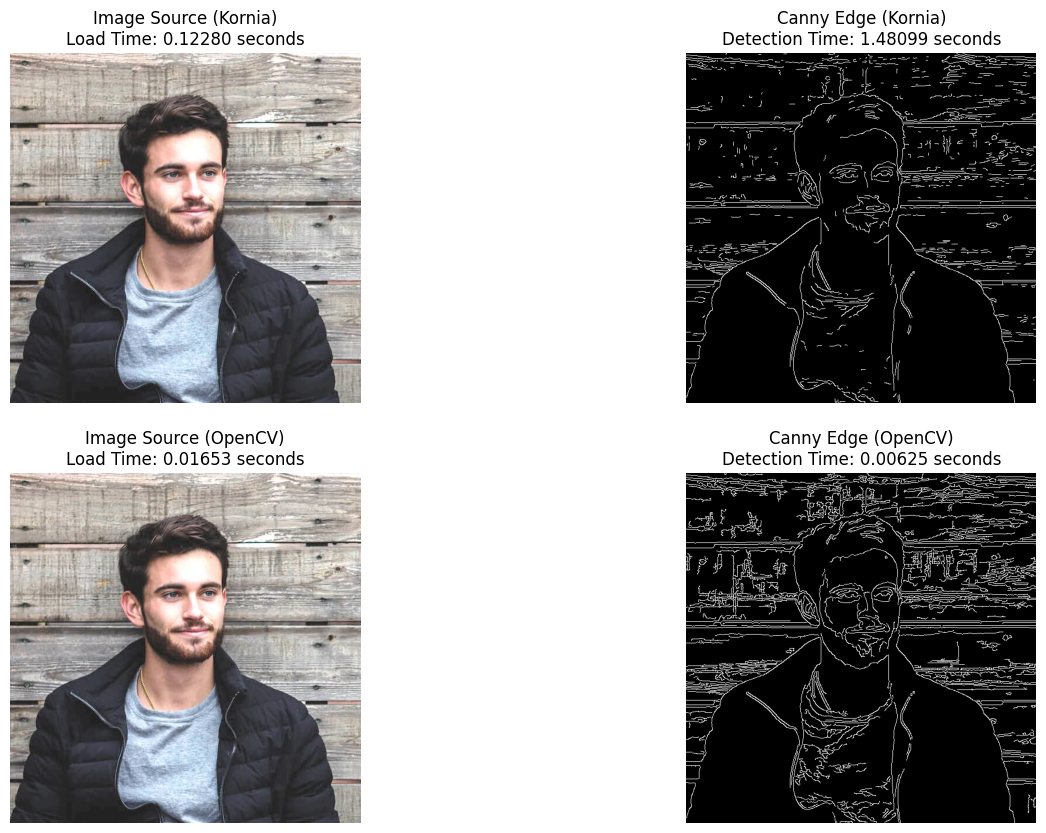

In [ ]:
import kornia
import torch
import cv2
import matplotlib.pyplot as plt
import time
from io import BytesIO

# Load image with Kornia
start_time_kornia = time.time()
data = kornia.io.load_image("./photo.jpg", kornia.io.ImageLoadType.RGB32)[None, ...]
end_time_kornia = time.time()

# Convert image to RGB for Kornia Canny
data_rgb = kornia.color.bgr_to_rgb(data)

# Create the Canny operator with Kornia
canny_kornia = kornia.filters.Canny(low_threshold=0.4, high_threshold=0.5)

# Apply Canny edge detection with Kornia
start_time_canny_kornia = time.time()
_, x_canny_threshold = canny_kornia(data_rgb)
end_time_canny_kornia = time.time()

# Convert back to numpy with Kornia
img_canny_kornia = kornia.tensor_to_image(x_canny_threshold.byte())

# Calculate sizes for Kornia
original_size_kb_kornia = len(BytesIO(data.numpy().tobytes()).read()) / 1024
canny_kornia_size_kb = len(BytesIO(img_canny_kornia.tobytes()).read()) / 1024

# Load image with OpenCV
start_time_opencv = time.time()
image_opencv = cv2.imread("./photo.jpg")
image_opencv_rgb = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)
image_opencv_gray = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY)
end_time_opencv = time.time()

# Apply Gaussian blur with OpenCV
image_opencv_blur = cv2.GaussianBlur(image_opencv_gray, (5, 5), 0)

# Apply Canny edge detection with OpenCV
start_time_canny_opencv = time.time()
edges_opencv = cv2.Canny(image_opencv_blur, 50, 150)
end_time_canny_opencv = time.time()

# Calculate sizes for OpenCV
original_size_kb_opencv = len(BytesIO(cv2.imencode('.jpg', image_opencv)[1].tobytes()).read()) / 1024
canny_opencv_size_kb = len(BytesIO(cv2.imencode('.jpg', edges_opencv)[1].tobytes()).read()) / 1024

print(f"Original Image Size (Kornia): {original_size_kb_kornia:.2f} Kb")
print(f"Kornia Canny Edge Image Size: {canny_kornia_size_kb:.2f} Kb")
print(f"Original Image Size (OpenCV): {original_size_kb_opencv:.2f} Kb")
print(f"OpenCV Canny Edge Image Size: {canny_opencv_size_kb:.2f} Kb")

# Create the plot for both Kornia and OpenCV
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.ravel()

# Plot for Kornia
axs[0].axis("off")
axs[0].set_title(f"Image Source (Kornia)\nLoad Time: {end_time_kornia - start_time_kornia:.5f} seconds")
axs[0].imshow(kornia.tensor_to_image(data))

axs[1].axis("off")
axs[1].set_title(f"Canny Edge (Kornia)\nDetection Time: {end_time_canny_kornia - start_time_canny_kornia:.5f} seconds")
axs[1].imshow(img_canny_kornia, cmap="gray")

# Plot for OpenCV
axs[2].axis("off")
axs[2].set_title(f"Image Source (OpenCV)\nLoad Time: {end_time_opencv - start_time_opencv:.5f} seconds")
axs[2].imshow(image_opencv_rgb, cmap="gray")

axs[3].axis("off")
axs[3].set_title(f"Canny Edge (OpenCV)\nDetection Time: {end_time_canny_opencv - start_time_canny_opencv:.5f} seconds")
axs[3].imshow(edges_opencv, cmap="gray")

plt.show()


Original Image Size (Kornia): 4218.75 Kb
Kornia Laplacian Image Size: 1406.25 Kb
Original Image Size (OpenCV): 119.76 Kb
OpenCV Laplacian Image Size: 12.55 Kb


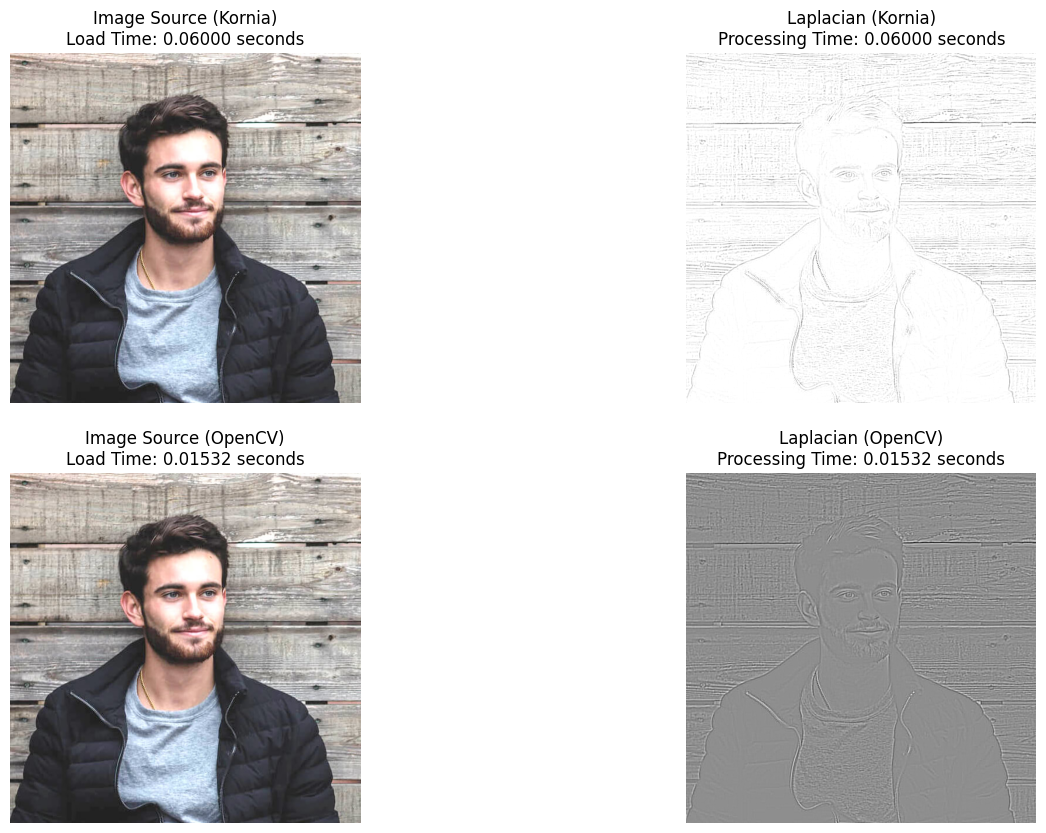

In [ ]:
import kornia
import torch
import cv2
import matplotlib.pyplot as plt
import time
from io import BytesIO

# Load image with Kornia
start_time_kornia = time.time()
data = kornia.io.load_image("./photo.jpg", kornia.io.ImageLoadType.RGB32)[None, ...]
end_time_kornia = time.time()

# Convert image to grayscale for Kornia Laplacian
data_gray = kornia.color.rgb_to_grayscale(data)

# Create the Laplacian operator with Kornia
laplacian_kornia = kornia.filters.laplacian(data_gray, kernel_size=5)

# Clamp values to the range [0, 1]
laplacian_kornia_normalized = 1.0 - laplacian_kornia.clamp(0.0, 1.0)

# Convert back to numpy with Kornia
img_laplacian_kornia = kornia.tensor_to_image(laplacian_kornia_normalized)

# Calculate sizes for Kornia
original_size_kb_kornia = len(BytesIO(data.numpy().tobytes()).read()) / 1024
laplacian_kornia_size_kb = len(BytesIO(img_laplacian_kornia.tobytes()).read()) / 1024

# Load image with OpenCV
start_time_opencv = time.time()
image_opencv = cv2.imread("./photo.jpg")
image_opencv_rgb = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)
image_opencv_gray = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY)
end_time_opencv = time.time()

# Apply Laplacian operator with OpenCV
laplacian_opencv = cv2.Laplacian(image_opencv_gray, cv2.CV_64F, ksize=5)

# Normalize values to the range [0, 1]
laplacian_opencv_normalized = 1.0 - cv2.normalize(laplacian_opencv, None, alpha=0.0, beta=1.0, norm_type=cv2.NORM_MINMAX)

# Calculate sizes for OpenCV
original_size_kb_opencv = len(BytesIO(cv2.imencode('.jpg', image_opencv)[1].tobytes()).read()) / 1024
laplacian_opencv_size_kb = len(BytesIO(cv2.imencode('.jpg', laplacian_opencv_normalized)[1].tobytes()).read()) / 1024

print(f"Original Image Size (Kornia): {original_size_kb_kornia:.2f} Kb")
print(f"Kornia Laplacian Image Size: {laplacian_kornia_size_kb:.2f} Kb")
print(f"Original Image Size (OpenCV): {original_size_kb_opencv:.2f} Kb")
print(f"OpenCV Laplacian Image Size: {laplacian_opencv_size_kb:.2f} Kb")

# Create the plot for both Kornia and OpenCV
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.ravel()

# Plot for Kornia
axs[0].axis("off")
axs[0].set_title(f"Image Source (Kornia)\nLoad Time: {end_time_kornia - start_time_kornia:.5f} seconds")
axs[0].imshow(kornia.tensor_to_image(data))

axs[1].axis("off")
axs[1].set_title(f"Laplacian (Kornia)\nProcessing Time: {end_time_kornia - start_time_kornia:.5f} seconds")
axs[1].imshow(img_laplacian_kornia, cmap="gray")

# Plot for OpenCV
axs[2].axis("off")
axs[2].set_title(f"Image Source (OpenCV)\nLoad Time: {end_time_opencv - start_time_opencv:.5f} seconds")
axs[2].imshow(image_opencv_rgb, cmap="gray")

axs[3].axis("off")
axs[3].set_title(f"Laplacian (OpenCV)\nProcessing Time: {end_time_opencv - start_time_opencv:.5f} seconds")
axs[3].imshow(laplacian_opencv_normalized, cmap="gray")

plt.show()


Original Image Size (Kornia): 4218.75 Kb
Kornia Sobel Image Size: 1406.25 Kb
Original Image Size (OpenCV): 119.76 Kb
OpenCV Sobel Image Size: 4.90 Kb


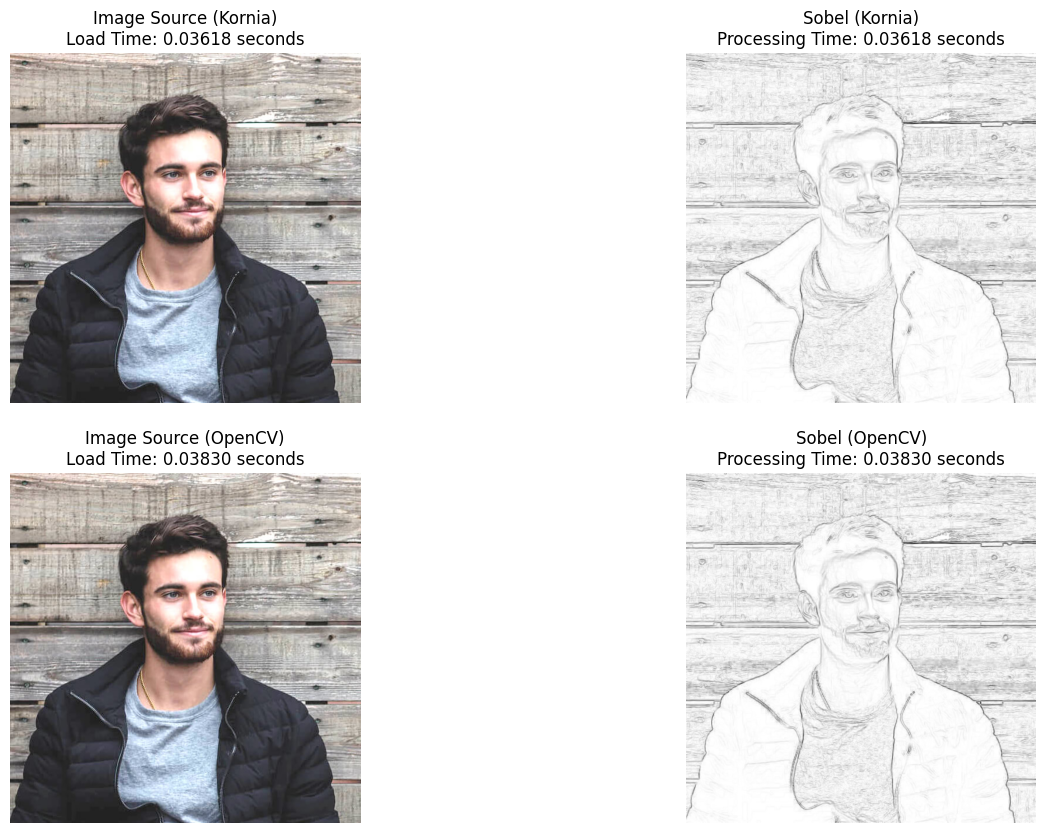

In [ ]:
import kornia
import torch
import cv2
import matplotlib.pyplot as plt
import time
from io import BytesIO

# Load image with Kornia
start_time_kornia = time.time()
data = kornia.io.load_image("./photo.jpg", kornia.io.ImageLoadType.RGB32)[None, ...]
end_time_kornia = time.time()

# Convert image to grayscale for Kornia Sobel
data_gray = kornia.color.rgb_to_grayscale(data)

# Create the Sobel operator with Kornia
sobel_kornia = kornia.filters.sobel(data_gray)

# Clamp values to the range [0, 1]
sobel_kornia_normalized = 1.0 - sobel_kornia.clamp(0.0, 1.0)

# Convert back to numpy with Kornia
img_sobel_kornia = kornia.tensor_to_image(sobel_kornia_normalized)

# Calculate sizes for Kornia
original_size_kb_kornia = len(BytesIO(data.numpy().tobytes()).read()) / 1024
sobel_kornia_size_kb = len(BytesIO(img_sobel_kornia.tobytes()).read()) / 1024

# Load image with OpenCV
start_time_opencv = time.time()
image_opencv = cv2.imread("./photo.jpg")
image_opencv_rgb = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)
image_opencv_gray = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY)
end_time_opencv = time.time()

# Apply Sobel operator with OpenCV
sobel_opencv_x = cv2.Sobel(image_opencv_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_opencv_y = cv2.Sobel(image_opencv_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_opencv = cv2.magnitude(sobel_opencv_x, sobel_opencv_y)

# Normalize values to the range [0, 1]
sobel_opencv_normalized = 1.0 - cv2.normalize(sobel_opencv, None, alpha=0.0, beta=1.0, norm_type=cv2.NORM_MINMAX)

# Calculate sizes for OpenCV
original_size_kb_opencv = len(BytesIO(cv2.imencode('.jpg', image_opencv)[1].tobytes()).read()) / 1024
sobel_opencv_size_kb = len(BytesIO(cv2.imencode('.jpg', sobel_opencv_normalized)[1].tobytes()).read()) / 1024

print(f"Original Image Size (Kornia): {original_size_kb_kornia:.2f} Kb")
print(f"Kornia Sobel Image Size: {sobel_kornia_size_kb:.2f} Kb")
print(f"Original Image Size (OpenCV): {original_size_kb_opencv:.2f} Kb")
print(f"OpenCV Sobel Image Size: {sobel_opencv_size_kb:.2f} Kb")

# Create the plot for both Kornia and OpenCV
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.ravel()

# Plot for Kornia
axs[0].axis("off")
axs[0].set_title(f"Image Source (Kornia)\nLoad Time: {end_time_kornia - start_time_kornia:.5f} seconds")
axs[0].imshow(kornia.tensor_to_image(data))

axs[1].axis("off")
axs[1].set_title(f"Sobel (Kornia)\nProcessing Time: {end_time_kornia - start_time_kornia:.5f} seconds")
axs[1].imshow(img_sobel_kornia, cmap="gray")

# Plot for OpenCV
axs[2].axis("off")
axs[2].set_title(f"Image Source (OpenCV)\nLoad Time: {end_time_opencv - start_time_opencv:.5f} seconds")
axs[2].imshow(image_opencv_rgb, cmap="gray")

axs[3].axis("off")
axs[3].set_title(f"Sobel (OpenCV)\nProcessing Time: {end_time_opencv - start_time_opencv:.5f} seconds")
axs[3].imshow(sobel_opencv_normalized, cmap="gray")

plt.show()


Original Image Size (Kornia): 4218.75 Kb
Sharpened Image Size (Kornia): 4218.75 Kb


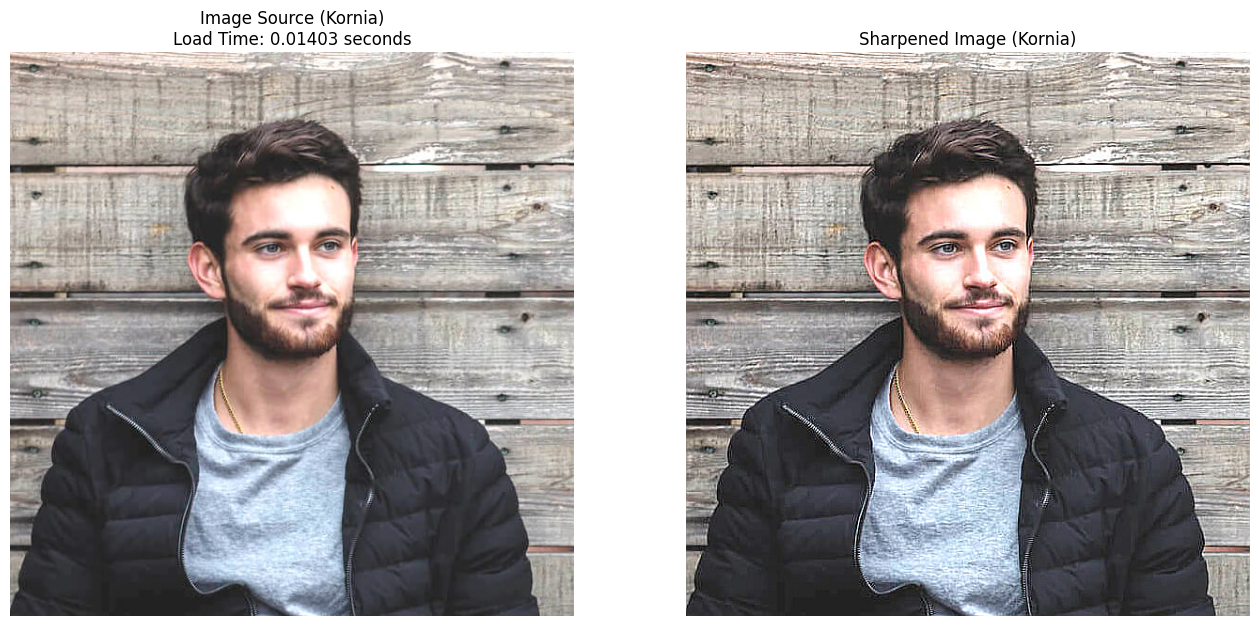

In [ ]:
import kornia
import matplotlib.pyplot as plt
import time
from io import BytesIO

# Load image with Kornia
start_time_kornia = time.time()
data = kornia.io.load_image("./photo.jpg", kornia.io.ImageLoadType.RGB32)[None, ...]
end_time_kornia = time.time()

# Apply sharpness enhancement with Kornia
sharpened_img_kornia = kornia.enhance.sharpness(data, factor=4.0)

# Convert back to numpy with Kornia
img_sharpened_kornia = kornia.tensor_to_image(sharpened_img_kornia)

# Calculate sizes for Kornia
original_size_kb_kornia = len(BytesIO(data.numpy().tobytes()).read()) / 1024
sharpened_kornia_size_kb = len(BytesIO(img_sharpened_kornia.tobytes()).read()) / 1024

print(f"Original Image Size (Kornia): {original_size_kb_kornia:.2f} Kb")
print(f"Sharpened Image Size (Kornia): {sharpened_kornia_size_kb:.2f} Kb")

# Create the plot for Kornia
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].axis("off")
axs[0].set_title(f"Image Source (Kornia)\nLoad Time: {end_time_kornia - start_time_kornia:.5f} seconds")
axs[0].imshow(kornia.tensor_to_image(data))

axs[1].axis("off")
axs[1].set_title(f"Sharpened Image (Kornia)")
axs[1].imshow(img_sharpened_kornia)

plt.show()
